In [1]:
using Plots
plot();

In [142]:
N(μ=0, σ²=1,N::Int=1)=begin
    σ=√σ²
    n=round(Int,N/2)+1
    U₁=rand(n)
    U₂=rand(n)
    wyn=zeros(2*n)
    wyn[1:Int(end/2)]=sqrt.(-2*log.(U₁)).*sin.(2*π*U₂)
    wyn[Int(end/2)+1:end]=sqrt.(-2*log.(U₁)).*cos.(2*π*U₂)
    wyn[1:N]
end

N (generic function with 4 methods)

In [143]:
Brown(;Δ=0.01,times=100,n=1000) = begin
    [cumsum(N(0,1,n))*√Δ for i in 1:times]
end

Brown (generic function with 1 method)

In [33]:
Δ=0.1
times=100
n=1000

1000

In [5]:
plot(Δ:Δ:Δ*n, Brown(Δ=Δ, n=n, times=times), leg=false);

In [68]:
plot(1:n, Brown(Δ=Δ, n=n, times=times), leg=false)

In [67]:
plot!(1:n, x->log(x*Δ)<1 ? 0/0 : sqrt(2*x*√Δ*log(log(x*√Δ))))

In [81]:
𝔼(;times=1000,Δ=0.01,n=1000)=begin
    E=Brown(Δ=Δ,n=n,times=times)
    (t)->begin
      sum(E[i][round(Int,t/Δ)] for i in 1:times)/times
    end
end

𝔼 (generic function with 1 method)

In [88]:
Var(;times=1000,Δ=0.01,n=1000)=begin
    E=Brown(Δ=Δ,n=n,times=times)
    (t)->begin
        T=round(Int,t/Δ)
        μ=sum(E[i][T] for i in 1:times)/times
        sum((E[i][T]-μ)^2 for i in 1:times)/(times-1)
    end
end

Var (generic function with 1 method)

In [90]:
a=𝔼()

#84 (generic function with 1 method)

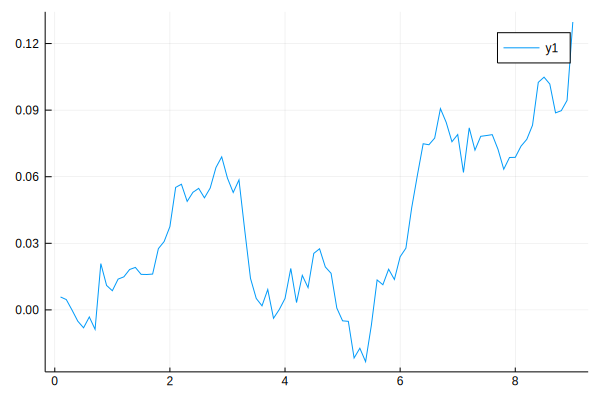

In [91]:
plot(Δ:Δ:9,t->a(t))

In [109]:
qₐ(;times=1000,Δ=0.01,n=1000)=begin
    tec=Brown(Δ=Δ,n=n,times=times)
    (t;α=0.01)->begin
        T=round(Int,t/Δ)
        temp=sort!([tec[i][T] for i in 1:times])
        temp[round(Int,(1-α)*times)]
    end
end

qₐ (generic function with 1 method)

In [110]:
a=qₐ()

#129 (generic function with 1 method)

In [151]:
α=[0.01*i for i in 1:99]

99-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 ⋮
 0.88
 0.89
 0.9
 0.91
 0.92
 0.93
 0.9400000000000001
 0.9500000000000001
 0.96
 0.97
 0.98
 0.99

In [149]:
α=[0.01, 0.05, 0.1, 0.2, 0.5]

5-element Vector{Float64}:
 0.01
 0.05
 0.1
 0.2
 0.5

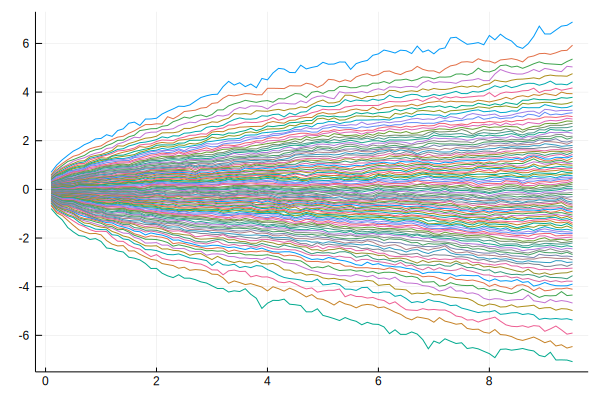

In [152]:
plot()
for i in α
     plot!(Δ:Δ:9.5, t->a(t,α=i), label="α=$i")
end
plot!(leg=false)

In [147]:
Ruch_Chi(;Δ=0.01,times=100,n=1000) = begin
    a=Brown(Δ=Δ,times=times,n=n+1)
    Y=zeros(times,n)
    for i in 1:times
        Y[i,:]==cumsum((a[i][j+1]-a[i][j])^2 for j in 1:n)
    end
    Y
end


Ruch_Chi (generic function with 1 method)

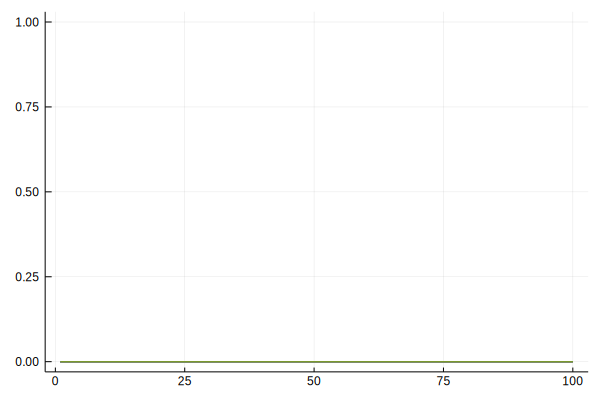

In [148]:
a=Ruch_Chi()
for i in 1:size(a)[1]
plot(Ruch_Chi(), leg=false)